<h1>Getting datasets from google drive to workspace </h1>

<h1>Data Preprocessing </h1>

<h2> Four Steps </h2>
<h3>Step 1: Create new directory structure for the datasets</h3>
<h3>Step 2: Copying images into new directory structure </h3>
<h3>Step 3: Dataset Exploration </h3>
<h4> Step 4: Dataset Visualization </h3>

<h3>Step 1 </h1>

<h2>Original VS New Directory Structure</h2>

In [43]:
dataset_dir = 'C:\\Users\\Akash\\Desktop\\Opencv\\Anti Spoofing\\final_antispoofing'
train_dataset_dir = 'C:\\Users\\Akash\\Desktop\\Opencv\\Anti Spoofing\\final_antispoofing\\test'
test_dataset_dir = 'C:\\Users\\Akash\\Desktop\\Opencv\\Anti Spoofing\\final_antispoofing\\test'

In [44]:
import os
os.mkdir('C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset')
os.mkdir('C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\train')
os.mkdir('C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\test')
os.mkdir('C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\train\\real')
os.mkdir('C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\train\\spoof')
os.mkdir('C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\test\\real')
os.mkdir('C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\test\\spoof')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset'

In [46]:
train_dir='C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\train'
test_dir = 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\test'

<h3>Step 2 </h3>

In [45]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [47]:
def train_test_splits(data_directory):
  for split_type in os.listdir(data_directory):
    path_to_split_type = os.path.join(data_directory,split_type)
    for category in os.listdir(path_to_split_type):
      path_to_category = os.path.join(path_to_split_type,category)
      for subject in os.listdir(path_to_category):
        path_to_subject = os.path.join(path_to_category,subject)
        for img in os.listdir(path_to_subject):
          if split_type == 'train':
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(train_dir,category,img))
          else:
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(test_dir,category,img))

In [48]:
train_test_splits(data_directory=dataset_dir)

<h3>Step 3 </h3>

<h3>Dataset Exploration </h3>

In [49]:
categories = ['real','spoof']

In [50]:
print("---------------------Exploring Training Datasets--------------------")
for category in categories:
  path = os.path.join(train_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in training directory".format(r1+s1))

print("-----------------------Exploring Testing Datasets-------------------------")
for category in categories:
  path = os.path.join(test_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in testing directory".format(r2+s2))

---------------------Exploring Training Datasets--------------------
There are 2102 images in real directory
There are 2118 images in spoof directory
There are 4220 total images in training directory
-----------------------Exploring Testing Datasets-------------------------
There are 477 images in real directory
There are 474 images in spoof directory
There are 951 total images in testing directory


<h3>Step 4 : Dataset Visualization </h3>

In [51]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [84]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()


In [85]:
training_image_path = get_images(data_dir= train_dir,number_of_samples=25)
print(training_image_path)
print(len(training_image_path))

['C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\train\\real\\20201110_113249.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\train\\real\\20201110_113251.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\train\\real\\20201110_113253.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\train\\real\\20201110_113254.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\train\\real\\20201110_113259hr_flip.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\train\\real\\20201110_113317hr_flip.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\train\\real\\20201110_113324hr_flip.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\train\\real\\20201110_113327hr_flip.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\train\\real\\20201110_113330hr_flip.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\train\\real\\20201110_113334.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv

<h3>Training Dataset Visualization</h3>

IndexError: list index out of range

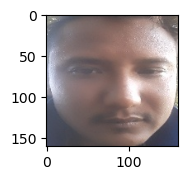

In [86]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)

Testing Dataset Visualization

In [61]:
testing_image_path = get_images(data_dir= test_dir,number_of_samples=25)
print(testing_image_path)
print(len(testing_image_path))

['C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\test\\real\\20201110_113245.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\test\\real\\20201110_113259.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\test\\real\\20201110_113320hr_flip.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\test\\real\\20201110_113342.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\test\\real\\20201110_113455hr_flip.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\test\\real\\20201110_113509.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\test\\real\\20201110_113513hr_flip.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\test\\real\\20201110_113518.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\test\\real\\20201110_113524.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_dataset\\test\\real\\20201110_113526hr_flip.jpg', 'C:\\Users\\Akash\\Desktop\\Opencv\\antispoofing_da

IndexError: list index out of range

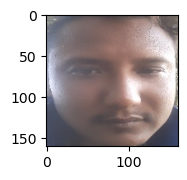

In [83]:
visualize_dataset(image_path=testing_image_path,rows=5,cols=10)

**<h3>Model Preparation</h3>**

<h3>Steps In Model Preparation</h3>
<h4>1. Choosing Framework and importing necessary libraries </h2>
<h4> 2. Load datasets and Perform image augmentations </h2>
<h4> 3. Model Selection  </h3>
<h4> 4. Compiling our model </h4>
<h4> 5. Setting our model checkpoints </h4>


<h4>Step 1 Keras Framework </h1>

In [63]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.layers import Dense,Dropout,Input,Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import model_from_json
import json

<h4>Step 2 </h4>

In [64]:
train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,fill_mode='nearest',shear_range=0.2,zoom_range=0.3,rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [65]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25,shuffle=True)

Found 4220 images belonging to 2 classes.


In [66]:
valid_generator = valid_datagen.flow_from_directory(test_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25)

Found 951 images belonging to 2 classes.


<h4>Step 3 Model Selection and Transfer Learning</h4>

In [80]:
mobilenet = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(160,160,3)))

In [67]:
mobilenet.trainable = False

In [68]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [13]:
model = Model(inputs = mobilenet.input,outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

<h4>Step 4 Compiling the models </h4>

In [69]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

<h4>Step 5 Setting our model checkpoints </h4>

In [70]:
import os
os.mkdir('C:\\Users\\Akash\\Desktop\\Opencv\\model_weights\\')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Akash\\Desktop\\Opencv\\model_weights\\'

In [71]:
model_checkpoint = ModelCheckpoint('C:\\Users\\Akash\Desktop\\Opencv\\model_weights\\finalyearproject_antispoofing_model_{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)

In [74]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator, 
    validation_steps = valid_generator.samples // 25,
    epochs = 100,
    callbacks=[model_checkpoint])

Epoch 1/100
168/168 [==============================] - 94s 558ms/step - loss: 0.3005 - accuracy: 0.8758 - val_loss: 0.1964 - val_accuracy: 0.9274

Epoch 00001: val_loss improved from 0.19977 to 0.19636, saving model to C:\Users\Akash\Desktop\Opencv\model_weights\finalyearproject_antispoofing_model_01-0.927368.h5
Epoch 2/100
168/168 [==============================] - 82s 486ms/step - loss: 0.3053 - accuracy: 0.8718 - val_loss: 0.1867 - val_accuracy: 0.9263

Epoch 00002: val_loss improved from 0.19636 to 0.18671, saving model to C:\Users\Akash\Desktop\Opencv\model_weights\finalyearproject_antispoofing_model_02-0.926316.h5
Epoch 3/100
168/168 [==============================] - 82s 490ms/step - loss: 0.2727 - accuracy: 0.8849 - val_loss: 0.1792 - val_accuracy: 0.9284

Epoch 00003: val_loss improved from 0.18671 to 0.17915, saving model to C:\Users\Akash\Desktop\Opencv\model_weights\finalyearproject_antispoofing_model_03-0.928421.h5
Epoch 4/100
168/168 [==============================] - 88s

In [75]:
# serialize model to JSON
model_json = model.to_json()
with open("finalyearproject_antispoofing_model_mobilenet.json", "w") as json_file:
    json_file.write(model_json)

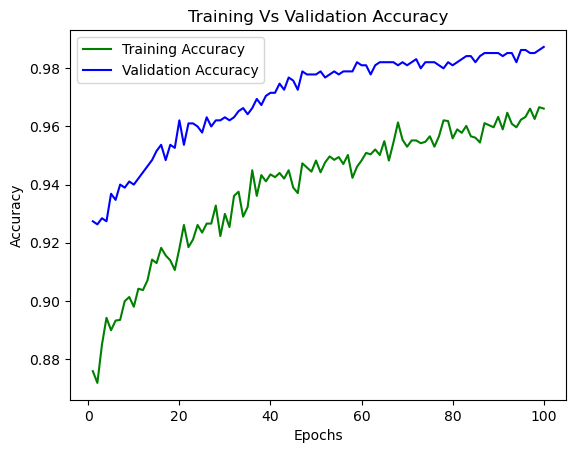

In [76]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
    

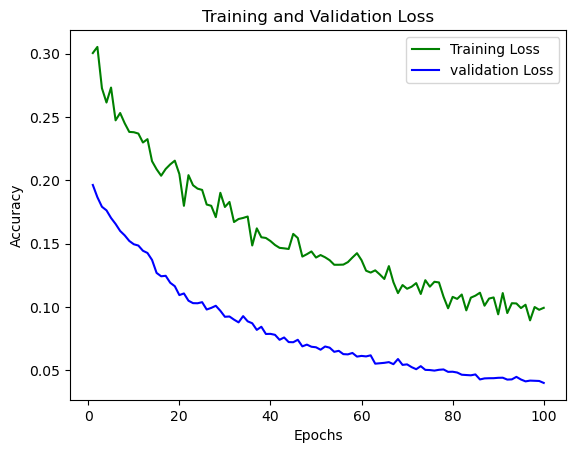

In [77]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [79]:
check_fakes(test_dir,categories[1])

{'spoof': 466, 'real': 8}

In [82]:
check_fakes(test_dir,categories[0])

{'real': 473, 'spoof': 4}

In [ ]:
(19+6)/(19+455+471+6)*100

In [81]:
100-2.6288

97.3712